In [170]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import os

In [171]:
# Defining constants
DATASETS_PATH = os.path.join(os.getcwd(), os.pardir, 'datasets')
TRAIN_PATH = os.path.join(DATASETS_PATH, 'cases_malaysia_train.csv')
TEST_PATH = os.path.join(DATASETS_PATH, 'cases_malaysia_test.csv')


In [172]:
#Data Loading
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)

In [173]:
# Data Exploration
train_df.head()


,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
0,25/1/2020,4,4,0,4,0,4,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26/1/2020,0,0,0,4,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27/1/2020,0,0,0,4,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28/1/2020,0,0,0,4,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29/1/2020,3,3,0,7,0,3,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
test_df.head()


,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
0,5/12/2021,4298.0,23,4928,61813,136,1017,38,3093,150,...,330,130,49,0,13,3,12,69,0,39
1,6/12/2021,4262.0,15,5894,60139,97,1036,39,3056,131,...,352,141,49,0,10,0,2,30,0,55
2,7/12/2021,4965.0,29,4817,60251,138,1130,46,3642,147,...,395,169,81,0,3,13,39,36,0,47
3,8/12/2021,5020.0,17,4525,60709,154,1162,41,3674,143,...,378,154,43,0,2,3,0,32,1,116
4,9/12/2021,5446.0,20,5427,60700,367,1207,53,4034,152,...,367,161,46,0,0,1,8,153,0,205


In [175]:
# Data Inspection
print(train_df.info())
print(test_df.info())
print("\nmissing values in train: \n", train_df.isna().sum())
print("\nduplicate values in train: ", train_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     680 non-null    object 
 1   cases_new                680 non-null    object 
 2   cases_import             680 non-null    int64  
 3   cases_recovered          680 non-null    int64  
 4   cases_active             680 non-null    int64  
 5   cases_cluster            680 non-null    int64  
 6   cases_unvax              680 non-null    int64  
 7   cases_pvax               680 non-null    int64  
 8   cases_fvax               680 non-null    int64  
 9   cases_boost              680 non-null    int64  
 10  cases_child              680 non-null    int64  
 11  cases_adolescent         680 non-null    int64  
 12  cases_adult              680 non-null    int64  
 13  cases_elderly            680 non-null    int64  
 14  cases_0_4                6

In [176]:
# inspect cases_new column
print(train_df['cases_new'].unique())

# found unique value " " and "?" in cases_new column but apparantly it doesnt detect the space as a missing value
weird_cases_new = train_df[train_df['cases_new'] == " "]
weird_cases_new

['4' '0' '3' '1' '2' '7' '14' '5' '28' '10' '6' '18' '12' '20' '9' '39'
 '41' '190' '125' '120' '117' '110' '130' '153' '123' '212' '106' '172'
 '235' '159' '150' '156' '140' '142' '208' '217' '179' '131' '170' '109'
 '118' '184' '134' '85' '69' '54' '84' '36' '57' '50' '71' '88' '51' '38'
 '40' '31' '94' ' ' '122' '55' '30' '45' '68' '67' '70' '16' '37' '17'
 '22' '47' '78' '48' '60' '187' '15' '103' '93' '277' '19' '33' '43' '8'
 '11' '21' '13' '23' '25' '26' '62' '100' '24' '182' '58' '95' '52' '82'
 '147' '72' '115' '101' '89' '260' '287' '317' '293' '432' '691' '489'
 '375' '354' '374' '561' '563' '660' '589' '629' '869' '871' '865' '862'
 '732' '847' '710' '?' '823' '1240' '835' '801' '649' '659' '957' '834'
 '1054' '1032' '1009' '1755' '852' '972' '822' '919' '1304' '1114' '1208'
 '1103' '1210' '1290' '958' '1041' '1096' '1884' '2188' '970' '935' '1109'
 '1315' '1309' '1212' '1472' '851' '1075' '1141' '1123' '1335' '1600'
 '1012' '959' '2234' '1810' '1937' '1229' '1371' '1772' '

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
98,2/5/2020,,11,116,1747,53,105,0,0,0,...,2,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,29/8/2020,,10,8,153,0,11,0,0,0,...,1,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279,30/10/2020,,0,491,10380,392,799,0,0,0,...,35,12,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,7/11/2020,,0,1029,11646,679,1168,0,0,0,...,47,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
476,15/5/2021,,9,3432,41914,999,4014,92,34,0,...,429,137,39,0.0,169.0,179.0,13.0,57.0,29.0,397.0
615,1/10/2021,,14,15891,159932,868,3750,1504,6634,1,...,784,385,124,0.0,6.0,439.0,22.0,8.0,0.0,393.0


We cannot simply remove the weird_cases_new rows because these are time series task.

Also, notice that all cluster columns are missing 50% of the data. As the starter, i will remove them first.

In [177]:
# remove all cluster columns
train_df_copy = train_df.copy()
cluster_columns = ['cluster_import', 'cluster_religious', 'cluster_community', 'cluster_highRisk', 'cluster_education', 'cluster_detentionCentre', 'cluster_workplace']
train_df_copy.drop(columns=cluster_columns, inplace=True)
train_df_copy

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,...,cases_0_4,cases_5_11,cases_12_17,cases_18_29,cases_30_39,cases_40_49,cases_50_59,cases_60_69,cases_70_79,cases_80
0,25/1/2020,4,4,0,4,0,4,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,26/1/2020,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,27/1/2020,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,28/1/2020,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,29/1/2020,3,3,0,7,0,3,0,0,0,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,30/11/2021,4879,24,5168,64978,97,1125,55,3595,104,...,308,479,209,1072,974,708,536,358,165,60
676,1/12/2021,5439,21,6803,63583,110,1363,54,3900,122,...,338,553,197,1172,1183,767,546,387,197,61
677,2/12/2021,5806,11,7246,62099,339,1325,40,4271,170,...,344,606,304,1279,1207,779,610,410,174,59
678,3/12/2021,5551,23,5301,62303,179,1312,46,4046,147,...,359,557,304,1270,1154,737,522,411,167,48


In [178]:
# reinspect the data after removing the NaN columns
train_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              680 non-null    object
 1   cases_new         680 non-null    object
 2   cases_import      680 non-null    int64 
 3   cases_recovered   680 non-null    int64 
 4   cases_active      680 non-null    int64 
 5   cases_cluster     680 non-null    int64 
 6   cases_unvax       680 non-null    int64 
 7   cases_pvax        680 non-null    int64 
 8   cases_fvax        680 non-null    int64 
 9   cases_boost       680 non-null    int64 
 10  cases_child       680 non-null    int64 
 11  cases_adolescent  680 non-null    int64 
 12  cases_adult       680 non-null    int64 
 13  cases_elderly     680 non-null    int64 
 14  cases_0_4         680 non-null    int64 
 15  cases_5_11        680 non-null    int64 
 16  cases_12_17       680 non-null    int64 
 17  cases_18_29     

In [179]:
# to investigate the method for imputation of cases_new, i will understand the pattern of the data first

# Data visualisation
date = pd.to_datetime(train_df_copy.pop('date'), dayfirst=True)
train_df_copy.head()

,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,cases_child,...,cases_0_4,cases_5_11,cases_12_17,cases_18_29,cases_30_39,cases_40_49,cases_50_59,cases_60_69,cases_70_79,cases_80
0,4,4,0,4,0,4,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,3,0,7,0,3,0,0,0,1,...,1,0,0,0,1,0,1,0,0,0


In [180]:
print(date)

0     2020-01-25
1     2020-01-26
2     2020-01-27
3     2020-01-28
4     2020-01-29
         ...    
675   2021-11-30
676   2021-12-01
677   2021-12-02
678   2021-12-03
679   2021-12-04
Name: date, Length: 680, dtype: datetime64[ns]


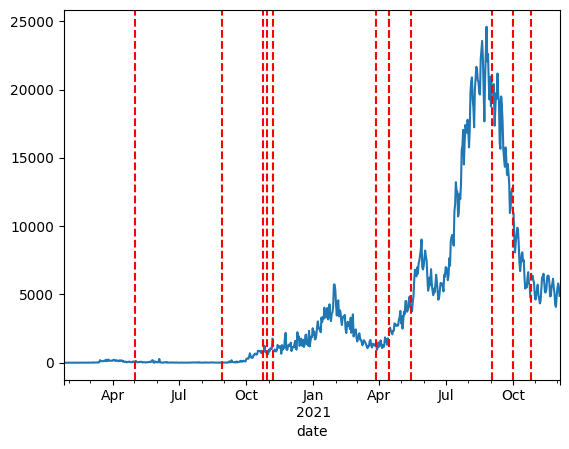

In [181]:
# #plot date against cases_new, since case_new has null value and is of type object, so need to plot scatter plot instead
# replace train_df_copy['cases_new'] == " " | train_df_copy['cases_new'] == "?" with np.nan first
# get the index of row where train_df_copy['cases_new'] is NaN
train_df_copy['cases_new'] = train_df_copy['cases_new'].replace(' ', np.nan)
train_df_copy['cases_new'] = train_df_copy['cases_new'].replace('?', np.nan)
train_df_copy['cases_new'] = train_df_copy['cases_new'].astype(float)
nan_cases_new = train_df_copy[train_df_copy['cases_new'].isna()].index
plot_sales = train_df_copy['cases_new']
plot_sales.index = date
_ = plot_sales.plot()
# mark index for nan_cases_new index on plot to see if there is any pattern
for i in nan_cases_new:
    plt.axvline(date[i], color='r', linestyle='--')
plt.show()

0


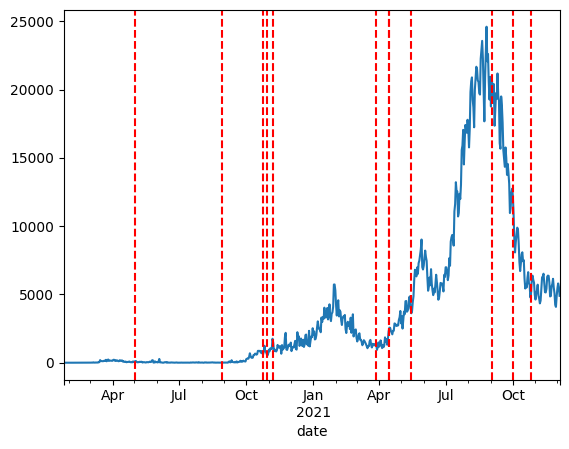

In [ ]:
# i dont use LOCF or NOCB imputation technique because the data is showing changes in direction, instead i will use spline nterpolation
# impute cases_new with spline interpolation
train_df_copy['cases_new'].interpolate(method='spline', order=3, inplace=True)
print(train_df_copy['cases_new'].isna().sum()) # succesfully remove nan values

# replot the graph
plot_sales = train_df_copy['cases_new']
plot_sales.index = date
_ = plot_sales.plot()
for i in nan_cases_new:
    plt.axvline(date[i], color='r', linestyle='--') # to show the pattern before and after imputation
plt.show()

<Figure size 3000x3000 with 0 Axes>

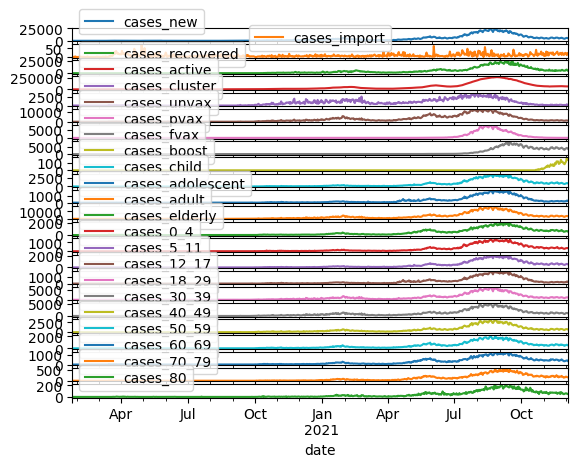

In [184]:
# Data Visualisation
plt.figure(figsize=(30, 30))
plot_cols = train_df_copy.columns
plot_features = train_df_copy[plot_cols]
plot_features.index = date
_ = plot_features.plot(subplots=True)
plt.show()

There is an obious train that all the graphs are left skewed, means many of the cases are reported to be growing obviously since January 2021, with a large growth on August-October

In [186]:
train_df_copy.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cases_new,680.0,3904.304290,5656.582522,0.0,46.50,1344.0,5435.25,24599.0
cases_import,680.0,8.788235,9.162540,0.0,3.00,6.0,12.00,72.0
cases_recovered,680.0,3766.514706,5622.296192,0.0,46.50,1201.5,5173.50,24855.0
cases_active,680.0,45733.016176,67888.984001,1.0,1158.25,14371.0,64899.25,263845.0
cases_cluster,680.0,717.130882,827.327827,0.0,13.00,417.5,1117.75,3394.0
cases_unvax,680.0,2452.023529,3191.392812,0.0,46.50,1257.5,3462.50,12684.0
cases_pvax,680.0,578.805882,1532.323940,0.0,0.00,0.0,118.25,7313.0
cases_fvax,680.0,868.045588,1877.386774,0.0,0.00,0.0,116.50,8456.0
cases_boost,680.0,4.763235,21.433285,0.0,0.00,0.0,0.00,170.0
cases_child,680.0,519.935294,831.685231,0.0,2.00,109.0,754.25,3437.0
